In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [223]:
decabase = pd.read_csv('./decabase_clean.csv',index_col=0)
decabase = decabase.dropna()
decabase.head()

,Rank,Athlete,Age,Team,Total Points,100-metres Rank,100-metres,100-metres PTS,long-jump Rank,long-jump,...,pole-vault PTS,javelin-throw Rank,javelin-throw,javelin-throw PTS,1500-metres Rank,1500-metres,1500-metres PTS,Competition,Date,Location
0,1,Daley Thompson,21.0,Great Britain,8522.0,1,10.62,947,1,8.00,...,819.0,6,64.16,801.0,10,279.9,681.0,Olympics,2000-09-27,Sydney
1,2,Yury Kutsenko,28.0,Soviet Union,8369.0,6,11.19,819,2,7.74,...,880.0,2,68.08,860.0,1,262.6,794.0,Olympics,2000-09-27,Sydney
2,3,Sergey Zhelanov,23.0,Soviet Union,8135.0,16T,11.40,774,4,7.60,...,790.0,10,57.30,697.0,3,267.5,761.0,Olympics,2000-09-27,Sydney
3,4,Georg Werthner,24.0,Austria,8084.0,20,11.44,765,9T,7.27,...,865.0,1,73.66,945.0,2,263.4,789.0,Olympics,2000-09-27,Sydney
4,5,Sepp Zeilbauer,27.0,Austria,7989.0,11,11.29,797,12,7.14,...,760.0,5,64.86,811.0,7,270.6,741.0,Olympics,2000-09-27,Sydney


In [224]:
decabase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 342
Data columns (total 38 columns):
Rank                      322 non-null int64
Athlete                   322 non-null object
Age                       322 non-null float64
Team                      322 non-null object
Total Points              322 non-null float64
100-metres Rank           322 non-null object
100-metres                322 non-null float64
100-metres PTS            322 non-null int64
long-jump Rank            322 non-null object
long-jump                 322 non-null float64
long-jump PTS             322 non-null float64
shot-put Rank             322 non-null object
shot-put                  322 non-null float64
shot-put PTS              322 non-null int64
high-jump Rank            322 non-null object
high-jump                 322 non-null float64
high-jump PTS             322 non-null int64
400-metres Rank           322 non-null object
400-metres                322 non-null float64
400-metres PTS   

In [247]:
scores = decabase[['Total Points',
                   '100-metres PTS','long-jump PTS','shot-put PTS','high-jump PTS','400-metres PTS',
                   '110-metre-hurdles PTS','discus-throw PTS','pole-vault PTS','javelin-throw PTS','1500-metres PTS']]
scores.columns=['TP','100', 'LJ', 'SP', 'HJ', '400', '110H', 'DT', 'PV', 'JT', '1500']
scores.head()

,TP,100,LJ,SP,HJ,400,110H,DT,PV,JT,1500
0,8522.0,947,1061.0,801,878,909.0,915.0,710,819.0,801.0,681.0
1,8369.0,819,995.0,759,878,877.0,845.0,662,880.0,860.0,794.0
2,8135.0,774,960.0,739,973,849.0,870.0,722,790.0,697.0,761.0
3,8084.0,765,878.0,695,831,849.0,840.0,627,865.0,945.0,789.0
4,7989.0,797,847.0,809,831,773.0,874.0,746,760.0,811.0,741.0


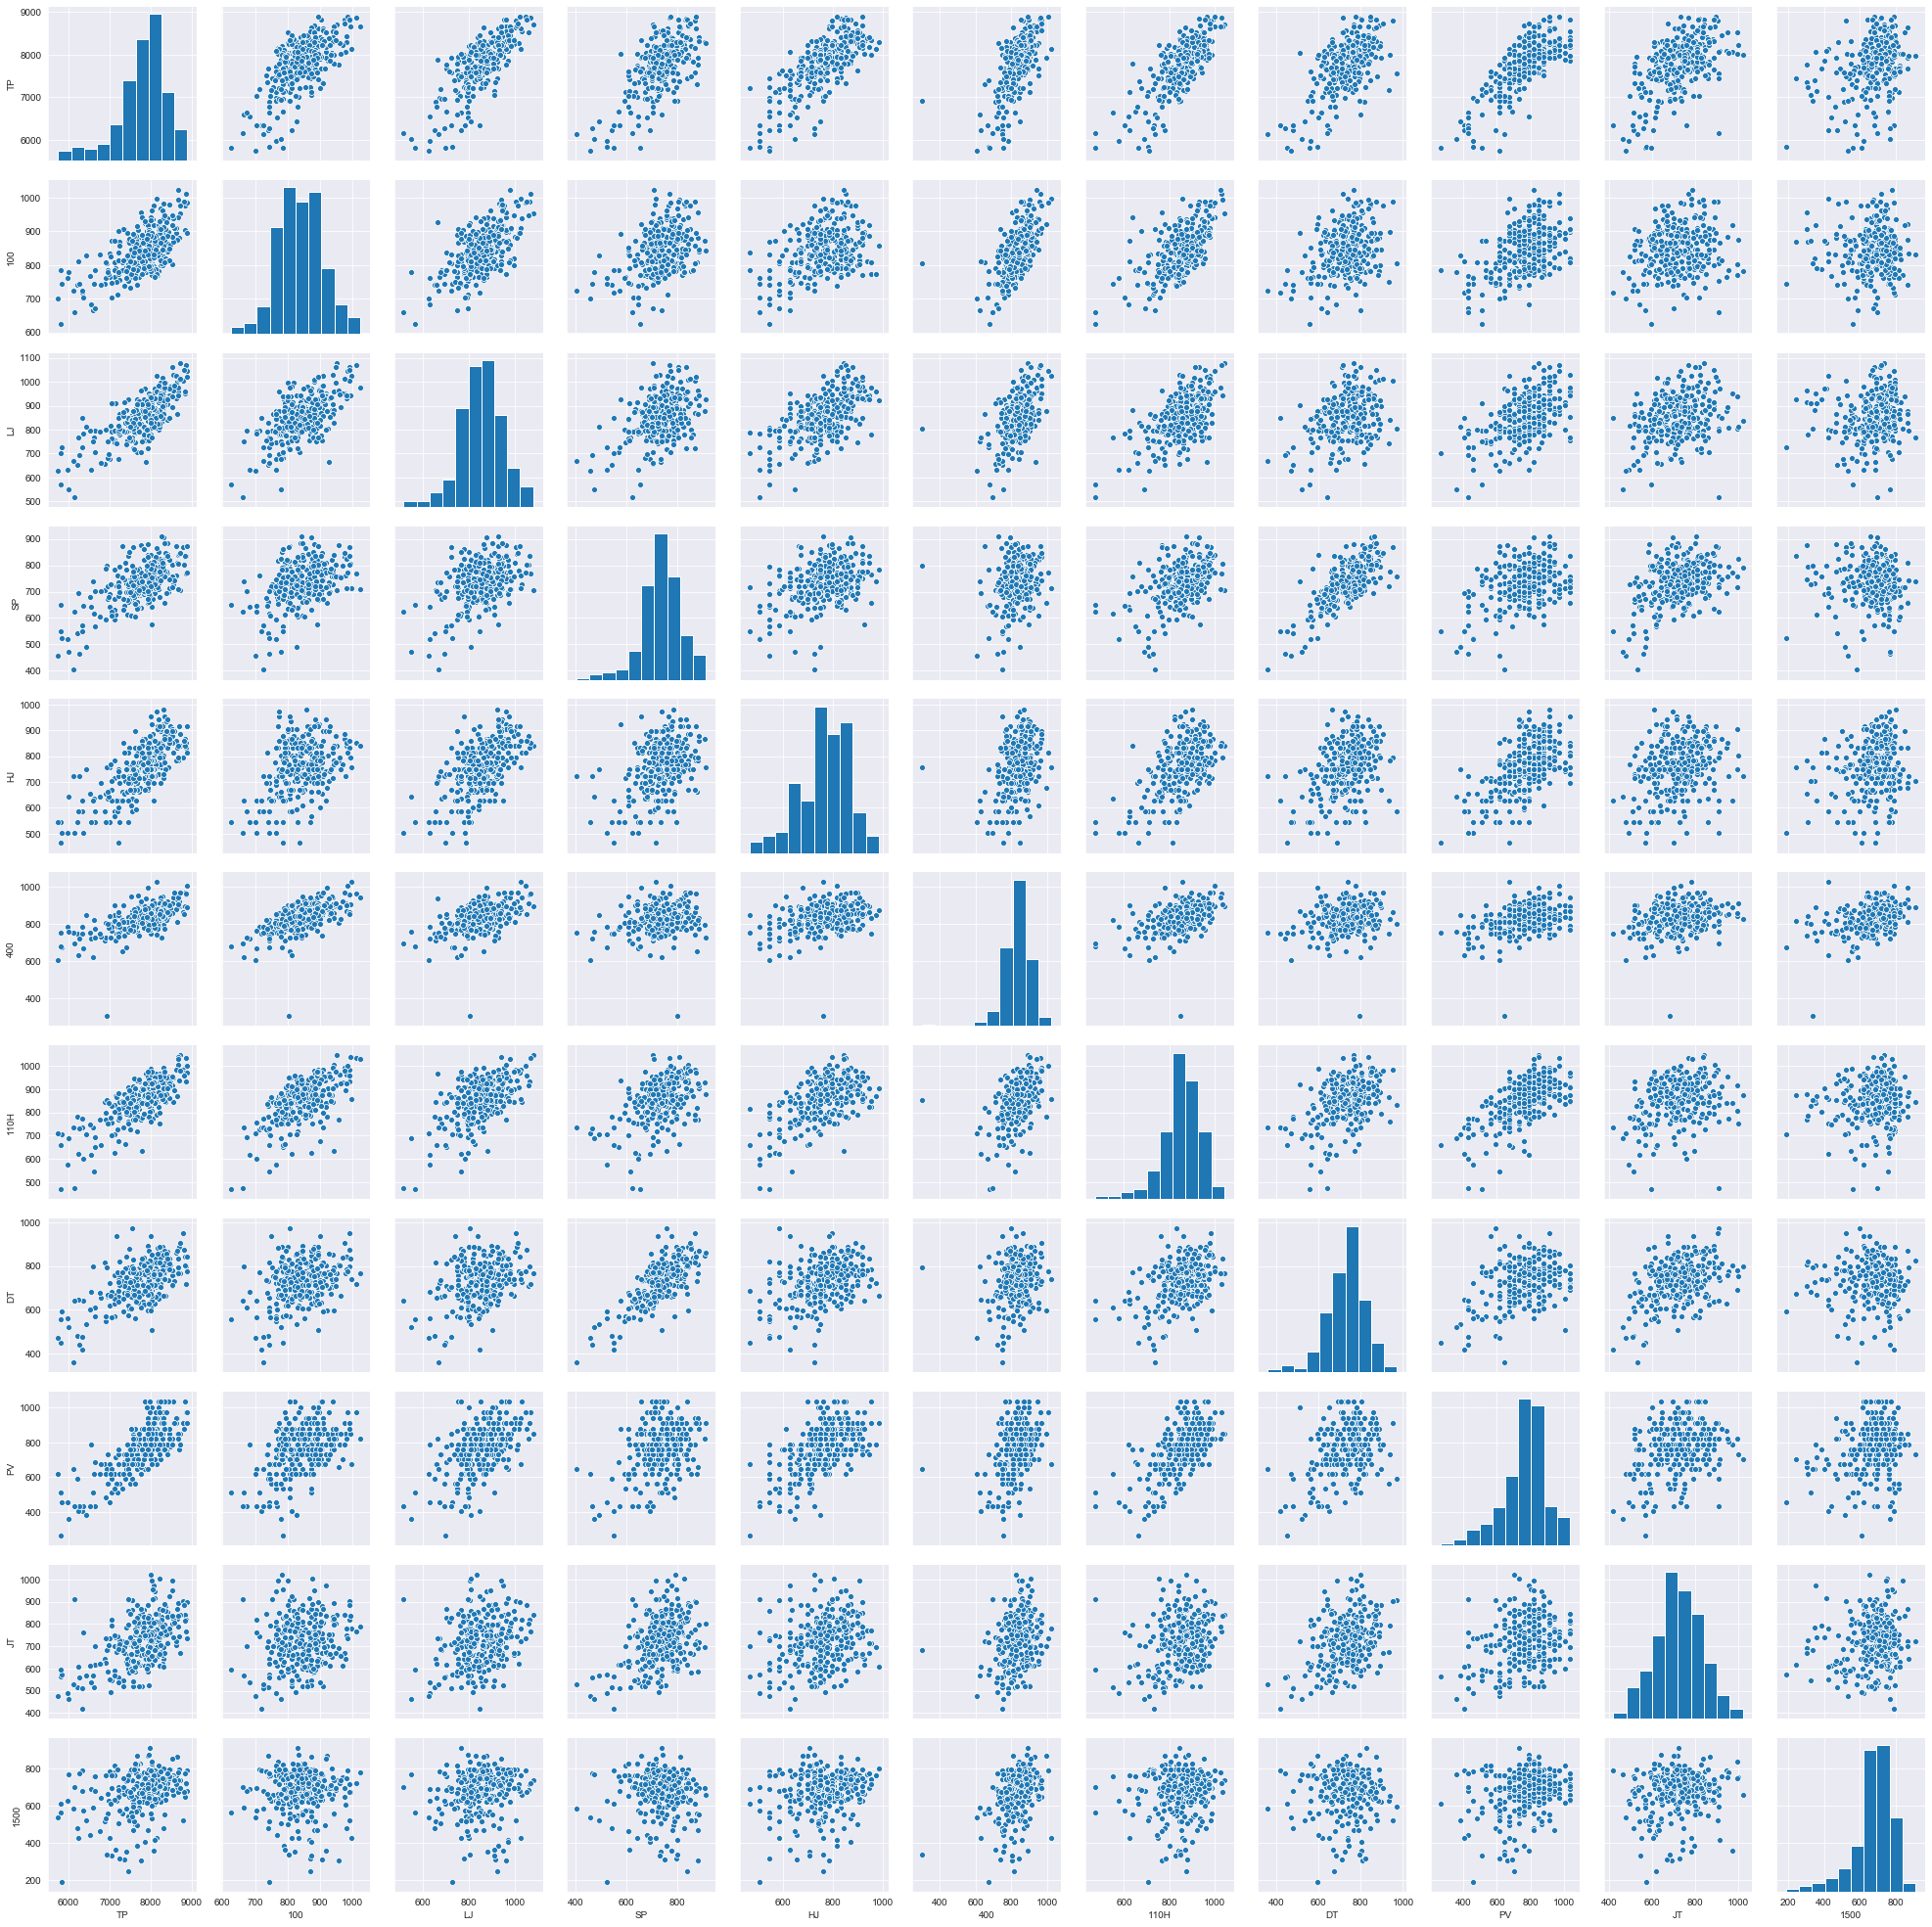

In [248]:
sns.pairplot(scores)

In [249]:
corr = scores.corr()

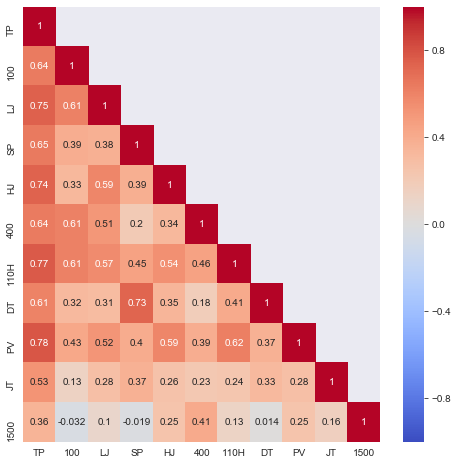

In [250]:
#Pearson
plt.figure(figsize=(8,8))
mask = np.invert(np.tril(np.ones_like(corr)).astype(bool))
ax = sns.heatmap(corr,annot=True,mask=mask,cmap='coolwarm',vmin=-1,vmax=1)
top,bottom = ax.get_ylim()
ax.set_ylim([bottom-0.5,top+0.5])
ax.invert_yaxis()

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x = scores.drop('TP',axis=1)
y = scores['TP']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=24)

forest = RandomForestRegressor(n_estimators=300,max_depth=10)
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

([<matplotlib.axis.XTick at 0x158e0f110>,
 <a list of 10 Text xticklabel objects>)

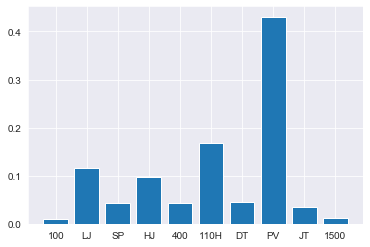

In [337]:
imp = forest.feature_importances_
plt.bar(np.arange(1,11),imp)
plt.xticks(np.arange(1,11),labels=['100', 'LJ', 'SP', 'HJ', '400', '110H', 'DT', 'PV', 'JT', '1500'])

In [353]:
core = scores[['TP','PV','110H','DT']]
core_x = core.drop('TP',axis=1)
core_y = core['TP']

In [354]:
core_x_train,core_x_test,core_y_train,core_y_test = train_test_split(core_x,core_y,test_size=0.33,random_state=42)

In [373]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(core_x_train,core_y_train)
lasso_pred = lasso.predict(core_x_test)
lasso.score(core_x_test,core_y_test)

0.8340435789399944

In [379]:
from sklearn.svm import SVR
svr = SVR(kernel='linear',gamma='scale')
svr.fit(core_x_train,core_y_train)
svr_pred = svr.predict(core_x_test)
svr.score(core_x_test,core_y_test)

0.8382899503948903

In [380]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(core_x_train,core_y_train)
ridge_pred = ridge.predict(core_x_test)
ridge.score(core_x_test,core_y_test)

0.8340928036209848

In [381]:
from sklearn.ensemble import RandomForestRegressor
forrest = RandomForestRegressor(n_estimators=300)
forrest.fit(core_x_train,core_y_train)
forrest_pred = forrest.predict(core_x_test)
forrest.score(core_x_test,core_y_test)

0.8432209760960273

In [383]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(cv=5)
elastic.fit(core_x_train,core_y_train)
elastic_pred = elastic.predict(core_x_test)
elastic.score(core_x_test,core_y_test)

0.8339331277113915

In [397]:
lasso_err = np.subtract(core_y_test,lasso_pred)
svr_err = np.subtract(core_y_test,svr_pred)
ridge_err = np.subtract(core_y_test,ridge_pred)
forrest_err = np.subtract(core_y_test,forrest_pred)
elastic_err = np.subtract(core_y_test,elastic_pred)

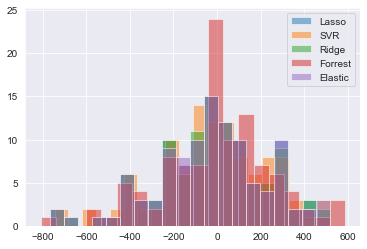

In [402]:
plt.hist(lasso_err,bins=20,alpha=0.5,label='Lasso')
plt.hist(svr_err,bins=20,alpha=0.5,label='SVR')
plt.hist(ridge_err,bins=20,alpha=0.5,label='Ridge')
plt.hist(forrest_err,bins=20,alpha=0.5,label='Forrest')
plt.hist(elastic_err,bins=20,alpha=0.5,label='Elastic')
plt.legend()